In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

### 数据处理

In [2]:
# 导入数据
data = pd.read_csv('park_info_with_grids.csv').fillna(0)
data.columns

Index(['Unnamed: 0', 'geometry', 'grid_id', 'Schools_count', 'Landmarks_count',
       'Metros_count', 'Housings_count', 'Affordable_Housings_count',
       'job_count', 'nearest_residential_distance', 'nearest_MHA_distance',
       'nearest_metro_distance', 'nearest_school_distance',
       'nearest_landmark_distance', 'nearest_park_distance',
       'distance_to_nearest_bike_network', 'POP_DENSITY',
       'EMPLOYED_PERCENTAGE', 'UNDER5_PERCENTAGE', '65_PERCENTAGE',
       'PEOPLE_OF_COLOR_PERCENTAGE', 'POVERTY_PERCENTAGE', 'TOTAL_AREA',
       'TYPE'],
      dtype='object')

In [3]:
data.head()

,Unnamed: 0,geometry,grid_id,Schools_count,Landmarks_count,Metros_count,Housings_count,Affordable_Housings_count,job_count,nearest_residential_distance,...,nearest_park_distance,distance_to_nearest_bike_network,POP_DENSITY,EMPLOYED_PERCENTAGE,UNDER5_PERCENTAGE,65_PERCENTAGE,PEOPLE_OF_COLOR_PERCENTAGE,POVERTY_PERCENTAGE,TOTAL_AREA,TYPE
0,0,"POLYGON ((-13607990.19116259 6023951.23868917,...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,POLYGON ((-13608506.81627558 6023962.862982571...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,"POLYGON ((-13608682.76518992 6023966.61165225,...",2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,POLYGON ((-13610206.44615618 6023341.900384837...,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,POLYGON ((-13608853.09858667 6024384.237879843...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


特征数组：在机器学习中，特征数组（如代码中的 features 或经过标准化处理后的 X_scaled）是包含用于预测或分类的输入变量的数据结构。每个样本通常由多个特征组成，这些特征是对样本某些属性的量化描述。例如，在预测股票价格时，特征可能包括利率、失业率等。在代码里，features 是原始的特征数据，而 X_scaled 是经过标准化处理后的特征数据，标准化可以使不同特征具有相同的尺度，有助于提高模型的性能。

目标变量数组：目标变量数组（如代码中的 target）是我们希望模型预测或分类的变量。它代表了每个样本对应的真实结果。在回归问题中，目标变量是连续值；在分类问题中，目标变量是离散的类别标签。例如，在股票价格预测中，目标变量就是股票的价格。

In [4]:
features = data.drop(columns = ['TOTAL_AREA','TYPE','Unnamed: 0','geometry','grid_id'])
features.head()

,Schools_count,Landmarks_count,Metros_count,Housings_count,Affordable_Housings_count,job_count,nearest_residential_distance,nearest_MHA_distance,nearest_metro_distance,nearest_school_distance,nearest_landmark_distance,nearest_park_distance,distance_to_nearest_bike_network,POP_DENSITY,EMPLOYED_PERCENTAGE,UNDER5_PERCENTAGE,65_PERCENTAGE,PEOPLE_OF_COLOR_PERCENTAGE,POVERTY_PERCENTAGE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
target = data['TOTAL_AREA']
target = target.values # 转换为数组
target

array([0., 0., 0., ..., 0., 0., 0.])

标准化处理：代码中使用 StandardScaler 对特征数组 features 进行标准化处理，得到 X_scaled。标准化可以使特征具有零均值和单位方差，避免某些特征因尺度较大而对模型产生过大影响。

In [6]:
# 数据标准化
scaler = StandardScaler()
# 在机器学习中，特征缩放是提高性能的关键预处理步骤，StandardScaler 是 sklearn.preprocessing 模块中的一个类，它可以将特征缩放到均值为 0，标准差为 1。
X_scaled = scaler.fit_transform(features) # 拟合 + 缩放
# fit_transform 方法是 StandardScaler 类的一个重要方法，它结合了 fit 和 transform 两个操作。
# fit 方法用于计算数据的统计信息，如均值和标准差，这些统计信息将用于后续的缩放操作。
# transform 方法则使用 fit 方法计算得到的统计信息对数据进行实际的缩放。
# fit_transform 方法将这两个步骤合并为一个操作，它首先对输入的数据进行拟合，计算出均值和标准差，然后直接使用这些统计信息对数据进行缩放，并返回缩放后的数据。

# 代码 scaler = StandardScaler(); X_scaled = scaler.fit_transform(features) 的具体含义如下：
# scaler = StandardScaler()：这行代码创建了一个 StandardScaler 类的实例 scaler，用于后续的数据标准化处理。
# X_scaled = scaler.fit_transform(features)：这行代码调用了 scaler 的 fit_transform 方法，对输入的 features 数据进行拟合和转换。fit_transform 方法会计算 features 的均值和标准差，并使用这些统计信息对 features 进行标准化处理，最后将标准化后的数据赋值给 X_scaled。

In [7]:
original_index = np.arange(len(features)) # 生成数组
features_df = pd.DataFrame(X_scaled,index = original_index) # X_scaled 是经过标准化处理后的特征数组
target_df = pd.DataFrame(target,index = original_index,columns = ['target']) # target 是目标变量数组

### 数据分割

In [8]:
# 数据分割
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,target,test_size = 0.4,random_state = 42)

### 建立模型

#### 依次调整参数

手动调整参数
手动调整参数是根据经验或初步的试验对模型的关键参数设定初始值，以期望模型能有较好的表现。

rf_best_params：对于随机森林回归模型，n_estimators 表示森林中树的数量，设置为 100 意味着构建 100 棵决策树；max_depth 是树的最大深度，限制树的生长，避免过拟合；min_samples_split 规定了分裂节点所需的最小样本数，防止树过度分裂。

xgb_best_params：在 XGBoost 回归模型里，n_estimators 同样是提升树的数量；max_depth 控制树的深度；learning_rate 是学习率，用于控制每次迭代更新模型的步长，防止模型收敛过快。

xp_best_params：也是 XGBoost 回归模型的参数设置，不同的参数值可能是根据不同的数据集特点或先验经验确定的。

In [9]:
# 手动调整参数
rf_best_params = {
    'n_estimators':100,
    'max_depth':10,
    'min_samples_split':2 # 分裂节点所需的最小样本数
}

xgb_best_params = {
    'n_estimators':100,
    'max_depth':6,
    'learning_rate':0.1
}

xp_best_params = {
    'n_estimators':150,
    'max_depth':8,
    'learning_rate':0.05
}

初始化模型
使用上述手动调整好的参数来初始化模型。

** 是字典解包操作符，它将字典的键值对解包为函数调用时的关键字参数。这样可以方便地将手动调整好的参数传递给模型的构造函数。PoissonRegressor() 没有使用手动调整的参数，采用了默认参数。

In [10]:
# 初始化模型
rf_model = RandomForestRegressor(**rf_best_params) #  ** 是字典解包操作符。这种操作允许将一个字典的键值对解包为函数调用时的关键字参数。
xgb_model = XGBRegressor(**xgb_best_params)
poi_model = PoissonRegressor()
xp_model = XGBRegressor(**xp_best_params)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import PoissonRegressor

重新定义模型
这一步重新定义模型，将模型重置为默认参数状态，可能是为了后续进行更系统的参数搜索。

手动调参是方法一,下面建立的网格组合是方法二

In [12]:
# 定义模型
rf_model = RandomForestRegressor()
xgb_model = XGBRegressor()
poi_model = PoissonRegressor(max_iter = 1000) # increase the number of  iterations
xp_model = XGBRegressor()

定义参数网格
定义参数网格是为了进行网格搜索，通过尝试不同的参数组合，找到最优的参数配置。

rf_param_grid：随机森林回归模型的参数网格，n_estimators 有三个候选值，max_depth 有 None（表示不限制树的深度）、10 和 20 三个候选值。

xgb_param_grid：XGBoost 回归模型的参数网格，同样对 n_estimators 和 max_depth 进行不同值的组合。

poi_param_grid：泊松回归模型的参数网格，主要调整 alpha 参数，它是正则化强度的系数。

xp_param_grid：另一个 XGBoost 回归模型的参数网格，与前面的类似。

In [13]:
# 定义参数
rf_param_grid = {'n_estimators':[100,200,300],'max_depth':[None,10,20]}
xgb_param_grid = {'n_estimators':[100,200,300],'max_depth':[3,6,10]}
poi_param_grid = {'alpha':[0.1,1,10]} # PoissonRegressor has different parameters
xp_param_grid = {'n_estimators':[100,200,300],'max_depth':[None,10,20]}

#### 使用网格搜索,超参数优化

In [14]:
# 寻找最佳参数
# 1.1 获取一个使用网格搜索策略进行超参数调优的对象(GridSearchCV对象)
rf_grid_search = GridSearchCV(rf_model,rf_param_grid,scoring = 'r2',cv = 10)
xgb_grid_search = GridSearchCV(xgb_model,xgb_param_grid,scoring = 'r2',cv = 10)
poi_grid_search = GridSearchCV(poi_model,poi_param_grid,scoring = 'r2',cv = 10)
xp_grid_search = GridSearchCV(xp_model,xp_param_grid,scoring = 'r2',cv = 10)

In [15]:
# 1.2 fit 方法会用训练数据 X_train 和标签 y_train 来训练模型。
# 对于 GridSearchCV，它会在每个超参数组合上进行模型训练，然后通过交叉验证来评估模型性能，并选择性能最佳的参数组合。
rf_grid_search.fit(X_train,y_train)
xgb_grid_search.fit(X_train,y_train)
poi_grid_search.fit(X_train,y_train)
xp_grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [16]:
# 获取最佳模型
rf_best_model = rf_grid_search.best_estimator_
xgb_best_model = xgb_grid_search.best_estimator_
poi_best_model = poi_grid_search.best_estimator_
xp_best_model = xp_grid_search.best_estimator_

#### 开始训练,K折叠交叉验证

In [24]:
# 空间K折划分
def spatial_k_fold(X,y,n_splits = 5):
    # 定义一个名为 spatial_k_fold 的函数，它接收特征矩阵 X、标签向量 y 以及一个可选参数 n_splits，默认值为 5。
    # 这个函数的目的是使用 KFold 方法对数据进行 k 折交叉验证的分割，并返回分割后的索引
    kf = KFold(n_splits = n_splits)
    # 创建一个 KFold 对象 kf，n_splits 指定了要将数据集分割成的折数。这里使用传入的 n_splits 参数，默认是 5 折
    splits = []
    for train_index,val_index in kf.split(X):
        # 使用 kf.split(X) 方法对特征矩阵 X 进行分割，该方法会返回一个生成器，每次迭代会得到一对索引数组
        # train_index 是训练集的索引，val_index 是验证集的索引
        splits.append((train_index,val_index))
        # 目的是将每一次分割得到的训练集和验证集的索引对添加到 splits 列表中
    return splits
    # 返回存储了所有分割索引对的 splits 列表

# 交叉验证
def cross_validate(X,y,model,n_splits = 5):
    metrics_list = [] 
    # 初始化一个空列表，用于存储每次交叉验证得到的评估指标 # metrics 评估变量
    preds_list = [] 
    # 初始化一个空列表，用于存储每次交叉验证得到的预测结果
    splits = spatial_k_fold(X,y,n_splits = n_splits) 
    # 调用 spatial_k_fold 函数对数据集进行 k 折划分，得到划分后的索引

    for i,(train_index,val_index) in enumerate(splits): # 遍历每一个划分的训练集和验证集的索引对
        X_train_cv,X_val_cv = X[train_index],X[val_index]
        # 根据索引从原始特征矩阵 X 中提取训练集和验证集的特征
        y_train_cv,y_val_cv = y[train_index],y[val_index]
        # 根据索引从原始标签向量 y 中提取训练集和验证集的标签
        # 在 cross_validate 函数中，变量 y_train_cv 表示在每一次交叉验证中，从原始标签向量 y 里提取出来的训练集对应的标签。

        preds, metrics = train_and_evaluate(X_train_cv, y_train_cv, X_val_cv, y_val_cv, model)
        # 调用 train_and_evaluate 函数，传入训练集和验证集的数据以及模型，得到预测结果和评估指标
        metrics_list.append(metrics)
        # 将本次交叉验证得到的评估指标添加到 metrics_list 中

        # 获得OOF预测结果
        # 创建一个 DataFrame，用于存储本次交叉验证的真实标签、预测标签、模型名称和当前折数
        preds_df = pd.DataFrame({
            'true':y_val_cv,
            'pred':preds
        }) 
        preds_df['model'] = model.__class__.__name__
        # 在 DataFrame 中添加一列，记录使用的模型名称
        preds_df['fold'] = i
        # 在 DataFrame 中添加一列，记录当前是第几折交叉验证
        preds_list.append(preds_df)
        # 将本次交叉验证的预测结果 DataFrame 添加到 preds_list 中
        
    return metrics_list, pd.concat(preds_list)
    # 返回存储评估指标的列表和将所有预测结果 DataFrame 合并后的 DataFrame

In [27]:
# 模型训练和评估函数
def train_and_evaluate(X_train,y_train,X_test,y_test,model):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    metrics = {
        'RMSE':np.sqrt(mean_squared_error(y_test,preds)),
        'MAE':mean_absolute_error(y_test,preds),
        'MAPE':mean_absolute_percentage_error(y_test,preds),
        'RSQ':r2_score(y_test,preds) 
        # r2函数用于评估回归模型的性能,分数越接近 1，表示模型对数据的拟合效果越好；越接近 0 表示模型的预测效果接近随机预测,分数为负数时，说明模型的表现比简单地取均值预测还要差
    }
    return preds,metrics

def evaluate_models(X_train,y_train,X_test,y_test):
    models = {
        'rf':rf_best_model,
        'xgb':xgb_best_model,
        'poi':poi_best_model,
        'xp':xp_best_model
    } 
    # 定义一个字典 models，将模型名称作为键，对应的最佳模型作为值。
    # 这里的 rf_best_model、xgb_best_model、poi_best_model、xp_best_model 应该是已经定义好的最佳模型对象。

    metrics_list = [] # 初始化一个空列表 metrics_list，用于存储每个模型的评估指标。
    predictions_df_list = {} # 初始化一个空字典 predictions_df_list，用于存储每个模型的预测结果。
    oof_predictions = {} # 初始化一个空字典 oof_predictions，用于存储每个模型的 out-of-fold 预测结果。

    for name,model in models.items(): # 遍历 models 字典中的每个键值对，name 为模型名称，model 为对应的模型对象。
        print(f"Evaluating model: {name}") # 打印当前正在评估的模型名称。
        # 交叉验证
        metrics_list_cv, oof_preds = cross_validate(X_train, y_train, model) 
        # 调用 cross_validate 函数对当前模型进行交叉验证，返回评估指标列表 metrics_list_cv 和 out-of-fold 预测结果 oof_preds。
        
        avg_metrics = pd.DataFrame(metrics_list_cv).mean().to_dict() # 将交叉验证得到的评估指标列表转换为 DataFrame，计算均值，并转换为字典。
        avg_metrics['model'] = name # 在平均评估指标字典中添加模型名称。
        metrics_list.append(avg_metrics) # 将包含模型名称的平均评估指标字典添加到 metrics_list 列表中。

        # 训练 -》 为了获取直接预测结果
        final_preds, _ = train_and_evaluate(X_train, y_train, X_test, y_test, model)
        # 调用 train_and_evaluate 函数对当前模型进行训练和评估，返回最终预测结果 final_preds 和其他可能的结果（这里用 _ 忽略）。
        if len(final_preds) != len(y_test): # 检查最终预测结果的长度是否与真实标签 y_test 的长度一致，如果不一致则抛出 ValueError 异常。
            raise ValueError(f"Length of predictions for model '{name}' does not match y_test length.")
        
        # final 预测结果
        final_preds_df = pd.DataFrame({
            'true': y_test,
            'pred': final_preds,
            'model': name
        }) # 将真实标签、最终预测结果和模型名称组合成一个 DataFrame。
        predictions_df_list[name] = final_preds_df # 将该 DataFrame 添加到 predictions_df_list 字典中，键为模型名称。

        # 收集OOF预测结果
        oof_predictions[name] = oof_preds # 将当前模型的 out-of-fold 预测结果添加到 oof_predictions 字典中，键为模型名称。
    
    final_predictions_df = pd.concat(predictions_df_list.values()) # 将 predictions_df_list 字典中的所有 DataFrame 按行拼接成一个大的 DataFrame。
    metrics_df = pd.DataFrame(metrics_list) # 将 metrics_list 列表转换为 DataFrame。

    return metrics_df, final_predictions_df, oof_predictions # 返回评估指标的 DataFrame、最终预测结果的 DataFrame 和 out-of-fold 预测结果的字典。

In [28]:
metrics_df, final_predictions_df, oof_predictions = evaluate_models(X_train, y_train, X_test, y_test)

# 打印指标
print(metrics_df)

# 打印最终预测结果
print(final_predictions_df)


# 打印各模型的 OOF 预测结果
for model_name, oof_df in oof_predictions.items():
    print(f"OOF predictions for {model_name}:")
    print(oof_df)

Evaluating model: rf
Evaluating model: xgb
Evaluating model: poi
Evaluating model: xp
          RMSE          MAE          MAPE       RSQ model
0  5817.111183  2099.096907  1.086167e+00  0.242005    rf
1  6168.623155  2109.540249  2.683280e+14  0.157319   xgb
2  6159.036651  2242.250850  1.342004e+17  0.146080   poi
3  6168.623155  2109.540249  2.683280e+14  0.157319    xp
       true         pred model
0       0.0     0.000000    rf
1       0.0     0.000000    rf
2     408.0  1301.777502    rf
3       0.0     0.000000    rf
4     327.0   356.841111    rf
...     ...          ...   ...
1066    0.0     0.437139    xp
1067    0.0     0.437139    xp
1068    0.0     0.437139    xp
1069    0.0     0.437139    xp
1070    0.0     0.437139    xp

[4284 rows x 3 columns]
OOF predictions for rf:
      true        pred                  model  fold
0      0.0    0.000000  RandomForestRegressor     0
1    488.0  799.061167  RandomForestRegressor     0
2      0.0    0.000000  RandomForestRegressor  

### 模型评估和选择

1.评估标准：平均绝对百分比误差 (MAPE)、平均绝对误差 (MAE) 和均方根误差 (RMSE)

2.模型总体误差对比 

3.OOF预测对比

4.实际数据和预测数据的拟合

5.空间误差

#### 模型评估和选择 – 模型总体误差对比

In [29]:
rf_preds = final_predictions_df[final_predictions_df['model'] == 'rf']['pred'].values
xgb_preds =  final_predictions_df[final_predictions_df['model'] == 'xgb']['pred'].values
poi_preds = final_predictions_df[final_predictions_df['model'] == 'poi']['pred'].values
xp_preds = final_predictions_df[final_predictions_df['model'] == 'xp']['pred'].values

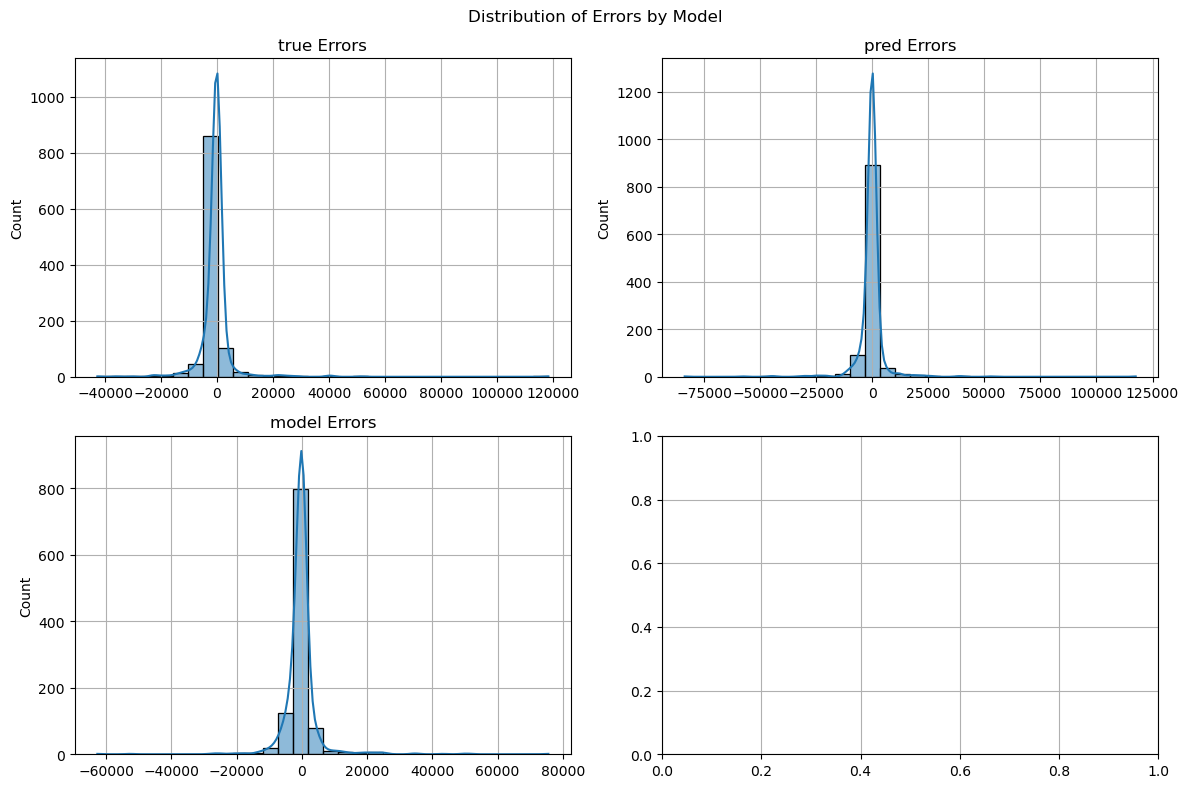

In [33]:
fig,axes = plt.subplots(2,2,figsize = (12,8))
# 这是一个for循环，使用zip函数将三个可迭代对象组合在一起进行遍历。
# axes.flatten()将二维的axes数组展平为一维数组，以便依次访问每个子图的坐标轴对象。
# final_predictions_df.columns是DataFrame final_predictions_df的列名，代表不同模型的名称。
# [rf_preds,xgb_preds,poi_preds,xp_preds] 是一个包含四个模型预测结果的列表。
# 在每次循环中，ax会被赋值为一个坐标轴对象，model_name会被赋值为一个模型名称，preds会被赋值为一个模型的预测结果。
for ax,model_name,preds in zip(axes.flatten(),final_predictions_df.columns,[rf_preds,xgb_preds,poi_preds,xp_preds]):
    # 使用seaborn库的histplot函数绘制直方图。
    # y_test - preds 计算真实值与预测值之间的误差。
    # ax=ax 指定将直方图绘制在当前循环对应的子图坐标轴上。
    # kde=True 表示同时绘制核密度估计曲线，用于展示误差的分布情况。
    # bins=30 指定直方图的柱子数量为30。
    sns.histplot(y_test-preds,ax=ax,kde=True,bins=30)
        # 使用set_title方法为当前子图设置标题。
    # f'{model_name} Errors' 是一个格式化字符串，将当前模型的名称和 "Errors" 组合在一起作为标题，用于说明该子图展示的是哪个模型的误差分布。
    ax.set_title(f'{model_name} Errors')
    # 使用grid方法为当前子图添加网格线，方便观察直方图的数值。
    ax.grid()

plt.suptitle('Distribution of Errors by Model')
plt.tight_layout()
plt.grid()
plt.show()

#### 模型评估和选择 – OOF预测对比

In [34]:
# 计算每个模型的平均评估指标
metrics_list = []

for model_name,df in oof_predictions.items(): # items() 是字典对象的一个方法，它返回一个包含字典所有键值对的视图对象，每个键值对以元组 (key, value) 的形式呈现。
    metrics = { # 创建一个字典metrics，用于存储当前模型的名称和各项评估指标。
        'model':model_name, 
        # 将当前模型的名称作为键 'model' 的值
        'MAPE':mean_absolute_percentage_error(df['true'],df['pred']),
        # 计算平均绝对百分比误差（MAPE），使用sklearn库中的mean_absolute_percentage_error函数，
        # 传入DataFrame df中的真实值列 'true' 和预测值列 'pred'
        'MAE':mean_absolute_error(df['true'],df['pred']),
        # 计算平均绝对误差（MAE），使用sklearn库中的mean_absolute_error函数，
        # 传入DataFrame df中的真实值列 'true' 和预测值列 'pred'
        'RMSE':np.sqrt(mean_squared_error(df['true'],df['pred']))
        # 计算均方根误差（RMSE），先使用sklearn库中的mean_squared_error函数计算均方误差，
        # 再使用numpy库中的sqrt函数对均方误差取平方根，传入DataFrame df中的真实值列 'true' 和预测值列 'pred'
    }
    metrics_list.append(metrics)

# 创建DataFrame
OOF_preds = pd.DataFrame(metrics_list)

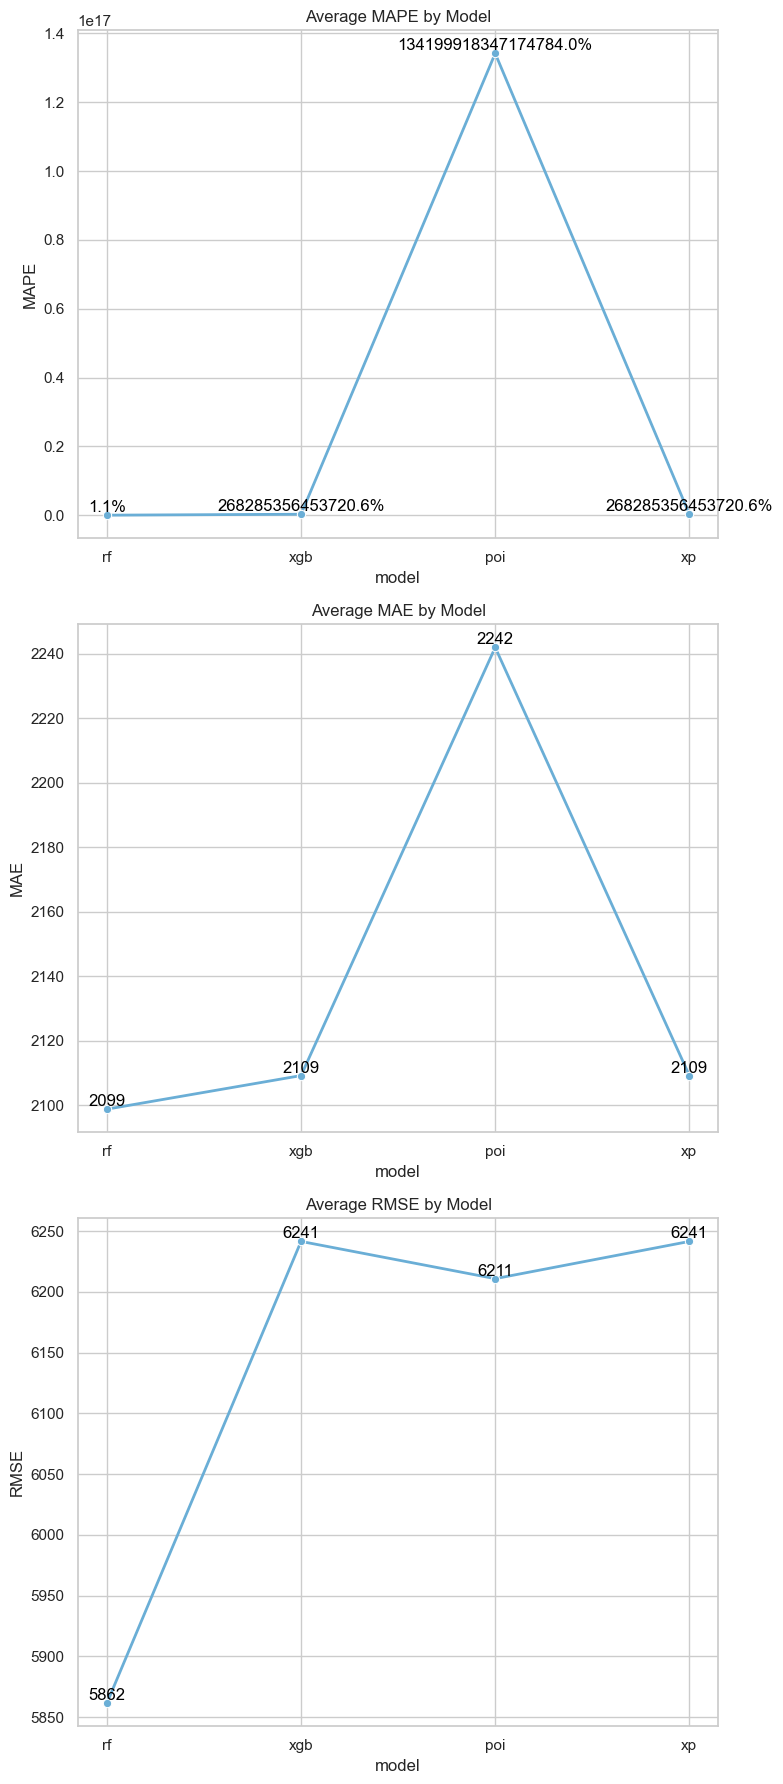

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置颜色和样式
sns.set(style = 'whitegrid')
bluePalette5 = sns.color_palette('Blues',5)

# 创建一个1*3的图形布局
fig,axes = plt.subplots(nrows = 3,ncols = 1,figsize = (8,18))

# 绘制 MAPE 图表
sns.lineplot(data=OOF_preds.drop_duplicates(subset=["model", "MAPE"]), 
             x="model", y="MAPE", ax=axes[0], color=bluePalette5[2], marker="o", linewidth=2)
for i in range(len(OOF_preds["model"].unique())):
    axes[0].text(i, OOF_preds.drop_duplicates(subset=["model", "MAPE"]).iloc[i]["MAPE"], 
                 f"{OOF_preds.drop_duplicates(subset=['model', 'MAPE']).iloc[i]['MAPE']:.1f}%", 
                 color='black', ha="center", va="bottom")
axes[0].set_title("Average MAPE by Model")

# 绘制 MAE 图表
sns.lineplot(data=OOF_preds.drop_duplicates(subset=["model", "MAE"]), 
             x="model", y="MAE", ax=axes[1], color=bluePalette5[2], marker="o", linewidth=2)
for i in range(len(OOF_preds["model"].unique())):
    axes[1].text(i, OOF_preds.drop_duplicates(subset=["model", "MAE"]).iloc[i]["MAE"], 
                 f"{OOF_preds.drop_duplicates(subset=['model', 'MAE']).iloc[i]['MAE']:.0f}", 
                 color='black', ha="center", va="bottom")
axes[1].set_title("Average MAE by Model")

# 绘制 RMSE 图表
sns.lineplot(data=OOF_preds.drop_duplicates(subset=["model", "RMSE"]), 
             x="model", y="RMSE", ax=axes[2], color=bluePalette5[2], marker="o", linewidth=2)
for i in range(len(OOF_preds["model"].unique())):
    axes[2].text(i, OOF_preds.drop_duplicates(subset=["model", "RMSE"]).iloc[i]["RMSE"], 
                 f"{OOF_preds.drop_duplicates(subset=['model', 'RMSE']).iloc[i]['RMSE']:.0f}", 
                 color='black', ha="center", va="bottom")
axes[2].set_title("Average RMSE by Model")

# 调整布局
plt.tight_layout()
plt.show()

#### 模型评估和选择 – 实际数据和预测数据的拟合

In [37]:
val_preds = final_predictions_df
val_preds

,true,pred,model
0,0.0,0.000000,rf
1,0.0,0.000000,rf
2,408.0,1301.777502,rf
3,0.0,0.000000,rf
4,327.0,356.841111,rf
...,...,...,...
1066,0.0,0.437139,xp
1067,0.0,0.437139,xp
1068,0.0,0.437139,xp
1069,0.0,0.437139,xp


##### 实际预测对比

In [38]:
# 计算每个模型的指标
metrics = val_preds.groupby('model').apply(
    lambda df: pd.Series({
        'RMSE': np.sqrt(mean_squared_error(df['true'], df['pred'])),
        'MAE': mean_absolute_error(df['true'], df['pred']),
        'MAPE': mean_absolute_percentage_error(df['true'], df['pred']),
        'RSQ': r2_score(df['true'], df['pred'])
    })
).reset_index()

# 将计算出的指标合并回 val_preds
val_preds = val_preds.merge(metrics, on='model', how='left')

/var/folders/hx/vrwsgqgx7bncbt28n44f0b540000gn/T/ipykernel_1410/2972736124.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics = val_preds.groupby('model').apply(


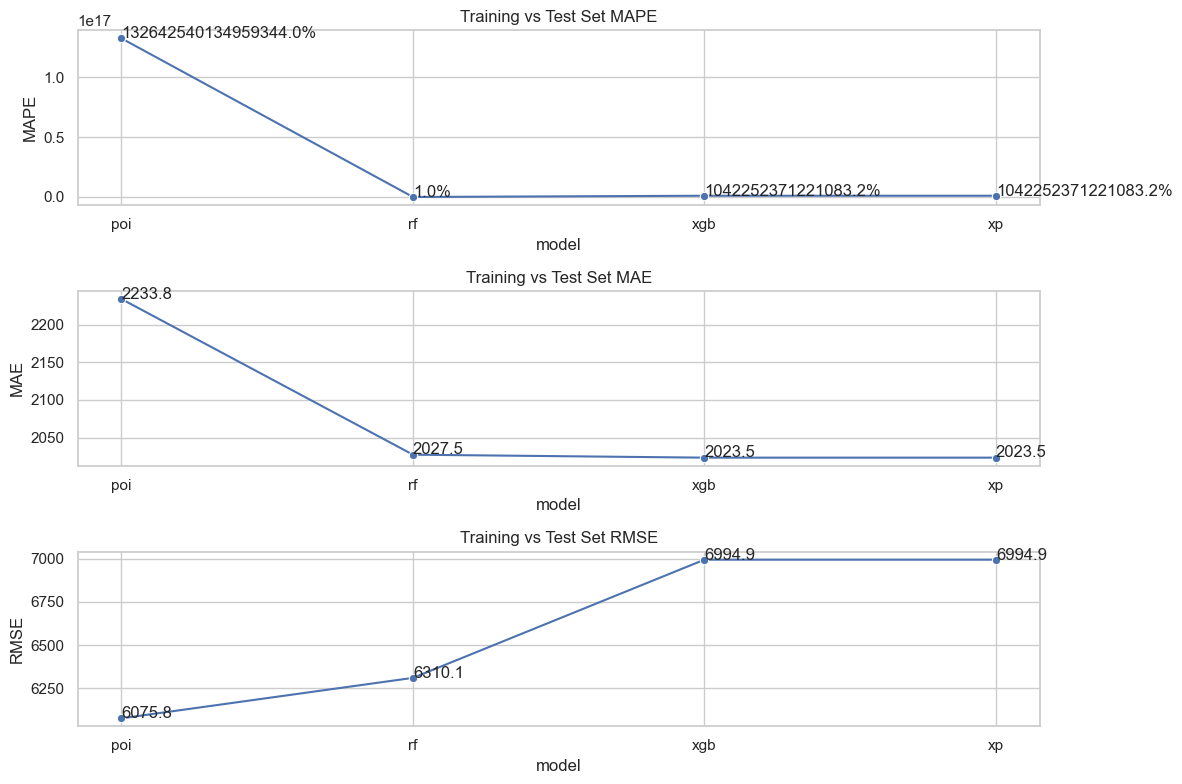

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制 MAPE
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
sns.lineplot(data=metrics, x='model', y='MAPE', marker='o')
for i in range(metrics.shape[0]):
    plt.text(i, metrics.MAPE.iloc[i] + 0.5, f"{metrics.MAPE.iloc[i]:.1f}%")
plt.title("Training vs Test Set MAPE")

# 绘制 MAE
plt.subplot(3, 1, 2)
sns.lineplot(data=metrics, x='model', y='MAE', marker='o')
for i in range(metrics.shape[0]):
    plt.text(i, metrics.MAE.iloc[i] + 0.5, f"{metrics.MAE.iloc[i]:.1f}")
plt.title("Training vs Test Set MAE")

# 绘制 RMSE
plt.subplot(3, 1, 3)
sns.lineplot(data=metrics, x='model', y='RMSE', marker='o')
for i in range(metrics.shape[0]):
    plt.text(i, metrics.RMSE.iloc[i] + 0.5, f"{metrics.RMSE.iloc[i]:.1f}")
plt.title("Training vs Test Set RMSE")

plt.tight_layout()
plt.show()

##### 预测值和实际数据的线性关系

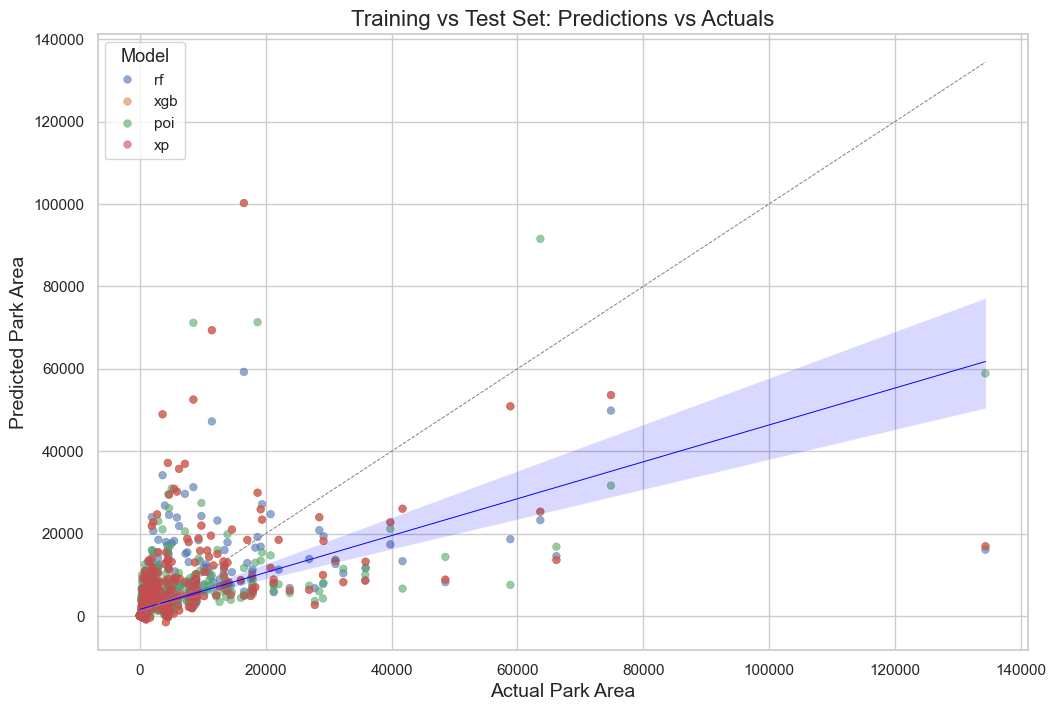

In [41]:
# 设置绘图风格和调色板
sns.set(style="whitegrid")

# 创建绘图对象
plt.figure(figsize=(12, 8))

# 使用 Seaborn 绘制散点图
plot = sns.scatterplot(
    data=val_preds,
    x='true',
    y='pred',
    hue='model',  # 使用模型类型作为颜色区分
    alpha=0.6,
    s=30,  # 散点大小
    edgecolor=None
)

# 添加回归线
sns.regplot(
    data=val_preds,
    x='true',
    y='pred',
    scatter=False,
    color='blue',
    line_kws={'linestyle': '-', 'linewidth': 0.7}
)

# 添加对角线
plt.plot(
    [val_preds['true'].min(), val_preds['true'].max()],
    [val_preds['true'].min(), val_preds['true'].max()],
    linestyle='--',
    color='grey',
    linewidth=0.7
)

# 配置图表的标题和轴标签
plt.title("Training vs Test Set: Predictions vs Actuals", fontsize=16)
plt.xlabel("Actual Park Area", fontsize=14)
plt.ylabel("Predicted Park Area", fontsize=14)
plt.legend(title='Model', title_fontsize='13', fontsize='11')

# 显示图表
plt.show()
